-----------------------------------

# <center> Sentiment Analysis on Flipkart Review Dataset </center> 

---------------------------

# 1] Method 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv("flipkart.csv")
df.head(5)

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [3]:
df.isnull().sum()

Unnamed: 0      0
Product_name    0
Review          0
Rating          0
dtype: int64

In [4]:
import re
import string
import nltk
from nltk.corpus import stopwords

stopword = set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer("english")


In [5]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

df["Review"] = df["Review"].apply(clean)

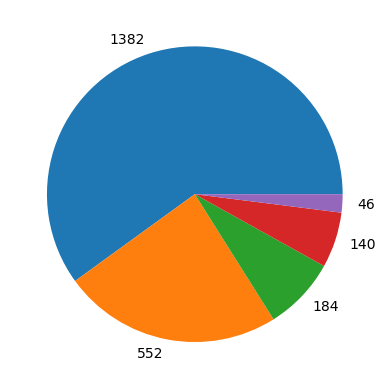

<Figure size 2000x1000 with 0 Axes>

In [6]:
ratings = df["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values


plt.pie(quantity, labels = ratings)
fig = plt.figure(figsize =(20,10))

plt.show()

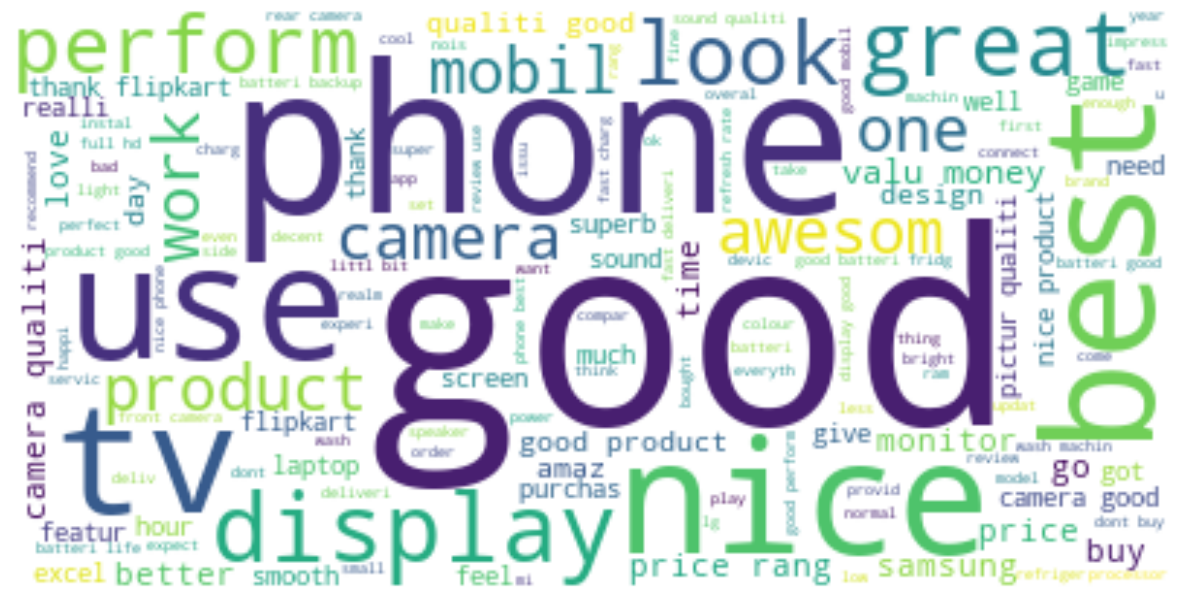

In [7]:
text = " ".join(i for i in df.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))

# reform, resizing of any image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 2] Method 2

In [8]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [9]:
sentiments = SentimentIntensityAnalyzer()

df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Review"]]
df = df[["Review", "Positive", "Negative", "Neutral"]]

df.head()

,Review,Positive,Negative,Neutral
0,best great performancei got around backup bi...,0.395,0.101,0.504
1,good perfom,0.744,0.000,0.256
2,great perform usual also game laptop issu batt...,0.277,0.000,0.723
3,wife happi best product 👌🏻😘,0.512,0.000,0.488
4,light weight laptop new amaz featur batteri li...,0.000,0.000,1.000


In [10]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


So most of the reviews are neutral. Let’s have a look at the total of Positive, Negative, and Neutral sentiment scores to find a conclusion about Flipkart reviews.

In [11]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  923.5529999999985
Negative:  96.77500000000013
Neutral:  1283.6880000000006


Most people gave Neutral reviews, and a small proportion of people give Negative reviews.
Therefore, we can say that people are satisfied with Flipkart products and services.